In [1]:
%load_ext autoreload
%autoreload 2

from math import pi
from glob import glob

import numpy as np
import matplotlib.pyplot as plt

import uproot
import pandas

In [2]:
from matplotlib.colors import LogNorm

In [3]:
plt.rcParams.update({'font.size': 18})

In [4]:
import decay as decay

In [5]:
# mass values, in MeV
xvals = np.linspace(1,500,500)

# mixing term [arbitrary for the purpose of this test]
Umix = 1e-2

ALPHA = 1

br_nununu = []
br_nugamma = []
br_nupi0 = []
br_pielec = []
br_pimuon = []
br_e_mu_nu = []
br_e_e_nu = []
br_mu_mu_nu = []
br_tot = []
for xval in xvals:
    
    # Mass, in GeV
    MASS = xval/1000.

    BR1 = decay._Gamma_nununu(MASS,Umix)
    BR2 = decay._Gamma_nugamma(MASS,Umix)
    BR3 = decay._Gamma_nupi0(MASS,Umix)
    BR4 = decay._Gamma_pilepton(MASS,Umix,1)
    BR5 = decay._Gamma_pilepton(MASS,Umix,2)
    BR6 = decay._Gamma_llnu1(MASS,Umix,1,2) 
    BR7 = decay._Gamma_llnu2(MASS,Umix,1,1)
    BR8 = decay._Gamma_llnu2(MASS,Umix,2,2)
    
    # Sum branching ratios to calculate fractional
    BRtot = BR1+BR2+BR3+BR4+BR5+BR6+BR7+BR8
 
    br_tot.append(BRtot)
    br_nununu.append(   BR1 )
    br_nugamma.append(  BR2 )
    br_nupi0.append(    BR3 )
    br_pielec.append(   BR4 )
    br_pimuon.append(   BR5 )
    br_e_mu_nu.append(  BR6 )
    br_e_e_nu.append(   BR7 )
    br_mu_mu_nu.append( BR8 )

In [6]:
br_tot      = np.array(br_tot)
br_nununu   = np.array(br_nununu)
br_nugamma  = np.array(br_nugamma)
br_nupi0    = np.array(br_nupi0)
br_pielec   = np.array(br_pielec)
br_pimuon   = np.array(br_pimuon)
br_e_mu_nu  = np.array(br_e_mu_nu)
br_e_e_nu   = np.array(br_e_e_nu)
br_mu_mu_nu = np.array(br_mu_mu_nu)

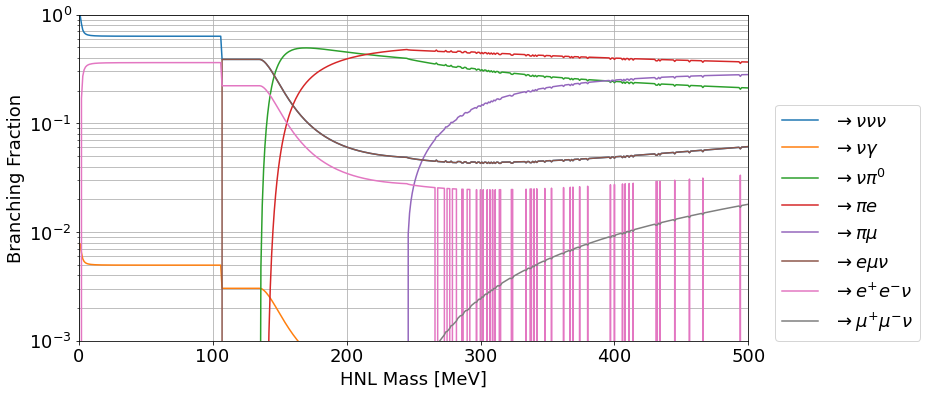

In [7]:
fig = plt.figure(figsize=(12,6))
plt.plot(xvals,br_nununu/br_tot,'-',label=r'$\rightarrow \nu\nu\nu$',markersize=3)
plt.plot(xvals,br_nugamma/br_tot,'-',label=r'$\rightarrow \nu\gamma$',markersize=3)
plt.plot(xvals,br_nupi0/br_tot,'-',label=r'$\rightarrow \nu\pi^0$',markersize=3)
plt.plot(xvals,br_pielec/br_tot,'-',label=r'$\rightarrow \pi e$',markersize=3)
plt.plot(xvals,br_pimuon/br_tot,'-',label=r'$\rightarrow \pi \mu$',markersize=3)
plt.plot(xvals,br_e_mu_nu/br_tot,'-',label=r'$\rightarrow e \mu \nu$',markersize=3)
plt.plot(xvals,br_e_e_nu/br_tot,'-',label=r'$\rightarrow e^{+} e^{-} \nu$',markersize=3)
plt.plot(xvals,br_mu_mu_nu/br_tot,'-',label=r'$\rightarrow \mu^{+} \mu^{-} \nu$',markersize=3)
plt.legend(loc=(1.04,0))
plt.ylim(1e-3,1)
plt.xlim([0,500])
plt.yscale('log')
plt.grid(which='both')
plt.xlabel('HNL Mass [MeV]')
plt.ylabel('Branching Fraction')
plt.show()